In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_acc
%store -r Y_relative_footsteps_acc
print(X_relative_footsteps_acc.shape)
print(Y_relative_footsteps_acc.shape)

(17646, 28)
(17646, 8)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where RL swings
idxs = np.where(X_relative_footsteps_acc[:, 23] == 1)[0]
X_relative_footsteps_acc_RL_swing = X_relative_footsteps_acc[idxs]
Y_relative_footsteps_acc_RL_swing = Y_relative_footsteps_acc[idxs]

## Predict RL foot -> x

In [8]:
X_relative_footsteps_acc_RL_swing[0, :]

array([ 0.        ,  0.        ,  0.        , -0.01667854,  0.02806931,
        0.04898649, -0.00293043,  0.04369139, -0.00966195,  0.22882891,
        0.16832004, -0.40987395,  0.23396882, -0.16832977, -0.40997042,
       -0.24291083,  0.16426133, -0.41338172, -0.24842681, -0.16367363,
       -0.41372354,  0.        ,  1.        ,  1.        ,  0.        ,
        0.1       ,  0.        ,  0.        ])

In [9]:
X_relative_footsteps_acc_RL_swing[0, :]

array([ 0.        ,  0.        ,  0.        , -0.01667854,  0.02806931,
        0.04898649, -0.00293043,  0.04369139, -0.00966195,  0.22882891,
        0.16832004, -0.40987395,  0.23396882, -0.16832977, -0.40997042,
       -0.24291083,  0.16426133, -0.41338172, -0.24842681, -0.16367363,
       -0.41372354,  0.        ,  1.        ,  1.        ,  0.        ,
        0.1       ,  0.        ,  0.        ])

### Linear Regression

In [11]:
# Input
X = np.hstack((X_relative_footsteps_acc_RL_swing[:, :3], # prev velocity command
               X_relative_footsteps_acc_RL_swing[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_RL_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_RL_swing[:, 4]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_swinging_x = LinearRegression()

# Fit the model
model_rl_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.8835207649521923
RMSE:  0.00537275119765075
The lowest error is:  9.648317297883402e-08
The highest error is:  0.043502219999444924
The avg. error is:  0.0028129692542171554


In [12]:
model_rl_relative_swinging_x.coef_

array([[-0.02131954, -0.01301363,  0.00061233,  0.10434056,  0.00142237,
        -0.00327612,  0.3480368 ,  0.13503034, -0.08275293,  0.11469235,
         0.51505229, -0.11701941,  0.01337772, -0.08347077]])

In [13]:
model_rl_relative_swinging_x.intercept_

array([-0.17891217])

Text(0, 0.5, 'Predictions')

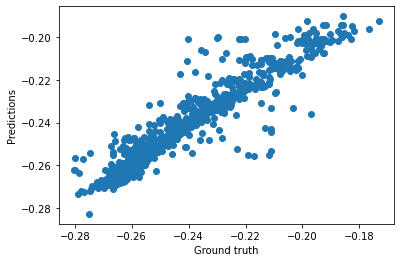

In [14]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [15]:
#%store model_rl_relative_swinging_x

In [16]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [17]:
# Save model
#joblib.dump(model_rl_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_swinging_x.sav")

### Predict RL foot -> y

In [21]:
# Input
X = np.hstack((X_relative_footsteps_acc_RL_swing[:, :3], # prev velocity command
               X_relative_footsteps_acc_RL_swing[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_RL_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_RL_swing[:, 5]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_swinging_y = LinearRegression()

# Fit the model
model_rl_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9164736186366444
RMSE:  0.009097866240886033
The lowest error is:  3.3380451538445044e-06
The highest error is:  0.04812435828170572
The avg. error is:  0.005870021118043482


In [22]:
model_rl_relative_swinging_y.coef_

array([[-4.25874083e-02, -2.52492862e-02,  8.93343974e-03,
         1.57694478e-03,  1.03524826e-01,  1.04203854e-01,
        -8.44407531e-03,  4.39877842e-01,  7.95378935e-02,
         2.58705189e-02,  3.04624338e-02,  5.29652493e-01,
         4.62647499e-01, -5.92108362e-05]])

In [23]:
model_rl_relative_swinging_y.intercept_

array([0.11571438])

Text(0, 0.5, 'Predictions')

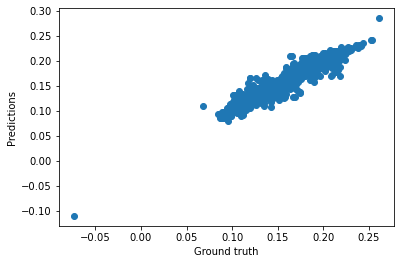

In [24]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [73]:
#%store model_rl_relative_swinging_y

In [74]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [75]:
# Save model
#joblib.dump(model_rl_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_swinging_y.sav")